In [2]:
# Import the required libraries
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [7]:
# Create empty lists to store the user data such as Name, City, Date of Purchase, Review & Rating
Names = []
Cities = []
Dates = []
Reviews = []
Ratings = []

# url of the flipkart website to scrape data
url = """https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZYQRLPCQ&marketplace=FLIPKART"""
driver = webdriver.Chrome()
driver.get(url)


while len(Names) < 320:

    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Extract names
    names_elements= soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
    for name in  names_elements:
        Names.append(name.text)

    # Extract cities
    city_elements = soup.find_all("p", {"class": "MztJPv"}) 
    for city in city_elements:
        Cities.append(city.text)

    # Extract dates
    dates_elements = soup.find_all("p", {"class": "_2NsDsF"}) 
    for date in dates_elements:
        Dates.append(date.text)
    Actual_Dates = Dates[1::2]

    # Extract reviews
    reviews_elements = soup.find_all("div", {"class": "ZmyHeo"})
    for review in reviews_elements:
        Reviews.append(review.text)

    # Extract ratings
    ratings_elements = soup.find_all("div", class_ = "XQDdHH Ga3i8K")
    for ratings in ratings_elements:
        Ratings.append(ratings.text)

    # Try to click the "Next" button
    try:
        next_button = driver.find_element(By.XPATH, "//span[text()='Next']")
        next_button.click()
        time.sleep(5)
    except:
        break

In [39]:
# Combine data into a DataFrame
df = pd.DataFrame({
    "Name": Names[:-1],
    "City": Cities[:-1],
    "Date": Actual_Dates[:-1],
    "Review": Reviews[:-1],
    "Ratings": Ratings
})

In [4]:
# Check the basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     323 non-null    object
 1   City     323 non-null    object
 2   Date     323 non-null    object
 3   Review   323 non-null    object
 4   Ratings  323 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 12.7+ KB


In [6]:
# Delete the duplicates from the dataframe
df1 = df.copy()
df1 = df1.drop_duplicates()
df1

,Name,City,Date,Review,Ratings
0,Akshay Meena,"Certified Buyer, Jaipur","Nov, 2023","So beautiful, so elegant, just a vowww😍❤️READ ...",5
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
2,bijaya mohanty,"Certified Buyer, Baleshwar",6 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
3,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
...,...,...,...,...,...
317,aditya verma,"Certified Buyer, Khairagarh",10 months ago,Most value for money iPhone ever.READ MORE,5
319,Devjyoti Das,"Certified Buyer, Dhubri",10 months ago,Amazing phone just no words to say...just one ...,5
320,manish choudhary,"Certified Buyer, Udaipur",11 months ago,I was sceptical at first about moving form an ...,5
321,Rahul Saini,"Certified Buyer, Gangapur City",11 months ago,Loved itREAD MORE,5


In [7]:
# Convert the Name column data to Title Case
df1['Name'] = df1['Name'].str.title()
df1.head()

,Name,City,Date,Review,Ratings
0,Akshay Meena,"Certified Buyer, Jaipur","Nov, 2023","So beautiful, so elegant, just a vowww😍❤️READ ...",5
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
2,Bijaya Mohanty,"Certified Buyer, Baleshwar",6 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
3,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5


In [8]:
# Cleaning the data of city column by removing unnecessary data
df1['City'] = df1['City'].str.replace("Certified Buyer, ", "", regex=False).str.strip()
df1.head()

,Name,City,Date,Review,Ratings
0,Akshay Meena,Jaipur,"Nov, 2023","So beautiful, so elegant, just a vowww😍❤️READ ...",5
1,Mousam Guha Roy,Matialihat,"Oct, 2023",Very niceREAD MORE,4
2,Bijaya Mohanty,Baleshwar,6 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
3,Prithivi Boruah,Bokajan,"Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Ajin V,Balaghat,"Oct, 2023",High quality camera😍READ MORE,5


In [9]:
# Cleaning data of Review column by removing unnecessary data & converting to lowercase
df1['Review'] = df1['Review'].str.lower().str.replace("read more", "", regex=False)
df1head()

,Name,City,Date,Review,Ratings
0,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4
2,Bijaya Mohanty,Baleshwar,6 months ago,just go for it.amazing one.beautiful camera wi...,5
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5
4,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5


In [10]:
# Import libraries for Sentimental analysis of review sentences 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ethen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ethen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ethen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Create a column called Reviews_t that stores tokenized sentences from the Review column using the sent_tokenize function.
df1["Reviews_t"] = df1['Review'].apply(sent_tokenize)
df1

,Name,City,Date,Review,Ratings,Reviews_t
0,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5,"[so beautiful, so elegant, just a vowww😍❤️]"
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice]
2,Bijaya Mohanty,Baleshwar,6 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it]
4,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍]
...,...,...,...,...,...,...
317,Aditya Verma,Khairagarh,10 months ago,most value for money iphone ever.,5,[most value for money iphone ever.]
319,Devjyoti Das,Dhubri,10 months ago,amazing phone just no words to say...just one ...,5,[amazing phone just no words to say...just one...
320,Manish Choudhary,Udaipur,11 months ago,i was sceptical at first about moving form an ...,5,[i was sceptical at first about moving form an...
321,Rahul Saini,Gangapur City,11 months ago,loved it,5,[loved it]


In [12]:
# Import mean from statistics
from statistics import mean

# Function created for assigning Polarity to the Reviews_t column
def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

# Apply the get_polarity function to the Reviews_t column to calculate and assign polarity values
df1['Polarity'] = df1['Reviews_t'].apply(get_polarity)

#  function is designed to compute the average polarity of each review by calculating the mean polarity of all sentences within the review
def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

# Calculates and shows the overall average polarity score for all the reviews in the dataset
df1['Average_Polarity'] = df1['Polarity'].apply(calculate_average_polarity)
df1['Average_Polarity'] = df1['Average_Polarity'].round(2)
df1.head(10)

,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity
0,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5,"[so beautiful, so elegant, just a vowww😍❤️]",[0.675],0.68
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78],0.78
2,Bijaya Mohanty,Baleshwar,6 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.60
4,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.16
5,Sheetla Prasad Maurya,Sultanpur,"Oct, 2023",best mobile phonecamera quality is very nice b...,4,[best mobile phonecamera quality is very nice ...,[0.738],0.74
6,Kriti Customer,Sarkaghat,10 months ago,"just loved the product , colour , design is wo...",5,"[just loved the product , colour , design is w...",[0.4125],0.41
7,Flipkart Customer,Aizawl,10 months ago,awesome photography experience. battery backup...,5,"[awesome photography experience., battery back...","[1.0, 0.7, 0.5]",0.73
8,Nikhil Kumar,Meerut Division,10 months ago,switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50
9,Rahul Shedge,Satara,"Oct, 2023",totally happy!camera 5battery 5 display 5design 5,5,[totally happy!camera 5battery 5 display 5desi...,[0.0],0.00


In [13]:
# Function to assign the Class to the Polarity
def sentiment_class(polarity):
    if polarity > 0.75:
        return 'extremely positive'
    elif 0 < polarity <= 0.75:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    elif -0.75 <= polarity < 0:
        return 'negative'
    else:
        return 'extremely negative'

# Calls sentiment_class function on the Average_Polarit column to assign the sentiment class
df1['Sentiment_Class'] = df1['Average_Polarity'].apply(sentiment_class)

In [14]:
df1.head()

,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity,Sentiment_Class
0,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5,"[so beautiful, so elegant, just a vowww😍❤️]",[0.675],0.68,positive
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78],0.78,extremely positive
2,Bijaya Mohanty,Baleshwar,6 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27,positive
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.60,positive
4,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.16,positive


In [15]:
# Calculates and prints the overall average polarity score of the entire dataset of reviews
polarity_score = df1['Average_Polarity'].mean().round(2)
print(f'Average Polarity Score : {polarity_score}')
if polarity_score > 0.75:
        print('The Average Polarity Score is Extremely Positive')
elif 0 < polarity_score <= 0.75:
    print('The Average Polarity Score is Positive')
elif polarity_score == 0:
    print('The Average Polarity Score is Neutral')
elif -0.75 <= polarity_score < 0:
    print('The Average Polarity Score is Negative')
else:
    print('The Average Polarity Score is Extremely Negative')

Average Polarity Score : 0.52
The Average Polarity Score is Positive


In [16]:
# Imports libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

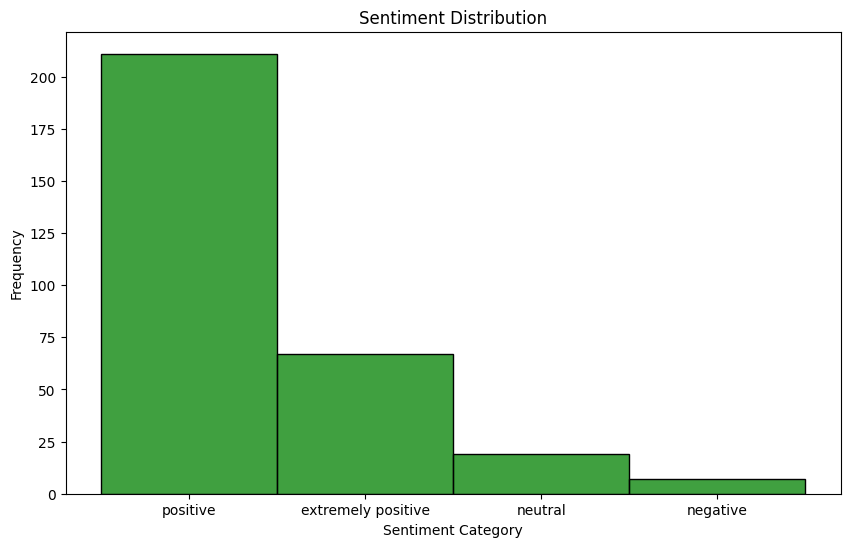

In [17]:
# Plots figure for Sentiment Distribution based on Sentiment Category
plt.figure(figsize=(10, 6))
sns.histplot(x=new_df1.Sentiment_Class, color='green')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [44]:
df1['Review_Length'] = df1['Review'].apply(lambda x: len(x.split()))

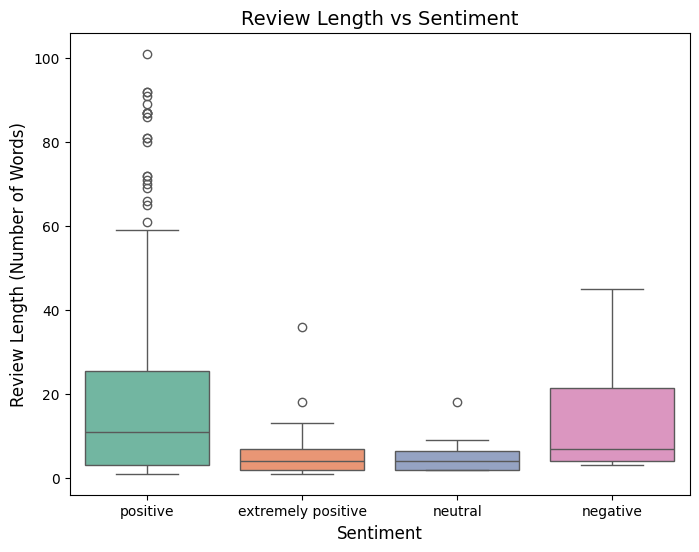

In [45]:
# Box Plot for Review Length by Sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment_Class', y='Review_Length', data=df1, hue = 'Sentiment_Class', palette='Set2')
plt.title('Review Length vs Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Review Length (Number of Words)', fontsize=12)
plt.show()

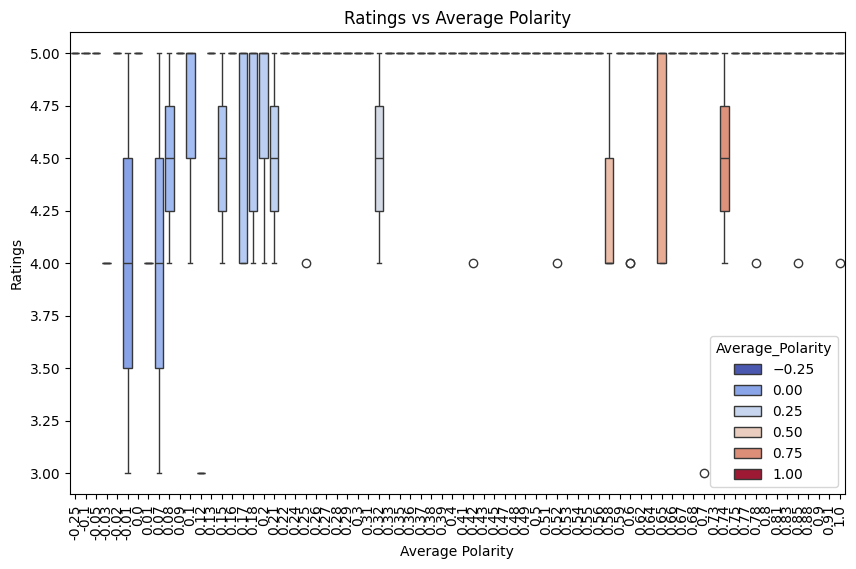

In [18]:
# Plotting ratings vs average polarity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Average_Polarity', y='Ratings', data = df1, hue = 'Average_Polarity', palette='coolwarm')
plt.title('Ratings vs Average Polarity')
plt.xlabel('Average Polarity')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.show()